<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/CNN_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# We download the data
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [3]:
# We load the content of the csv input file into a pandas dataframe
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# We discard the unnecessary columns and change the name of the remaining ones
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1,inplace=True)
df.columns = ['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# We map the label column into [0,1]
df['label_mapped'] = df['label'].map({'ham':0, 'spam':1})
Y = df['label_mapped'].values

In [6]:
# We perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],Y,test_size = 0.3)

In [7]:
# We tokenize the text and create the train and test sequences
vocab_size = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
seq_train = tokenizer.texts_to_sequences(X_train)  
seq_test = tokenizer.texts_to_sequences(X_test)
W = len(tokenizer.word_index)
print("number of unique words: {}".format(W))
# We pad the two sequences
seq_train_padded = tf.keras.preprocessing.sequence.pad_sequences(seq_train, padding='pre')
L = seq_train_padded.shape[1]
print("Length of the padded sequence: {}".format(L))
seq_test_padded = tf.keras.preprocessing.sequence.pad_sequences(seq_test,maxlen = L, padding='pre')

number of unique words: 7392
Length of the padded sequence: 162


In [8]:
# We create the model 
D = 20 # this is the embeding dimensionality
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(L,)),
                                    tf.keras.layers.Embedding(W+1,D),
                                    tf.keras.layers.Conv1D(32,kernel_size=2,activation='relu'),
                                    tf.keras.layers.MaxPool1D(),
                                    tf.keras.layers.Conv1D(64,kernel_size=2,activation='relu'),
                                    tf.keras.layers.MaxPool1D(),
                                    tf.keras.layers.Conv1D(128,2,activation='relu'),
                                    tf.keras.layers.GlobalMaxPooling1D(),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [9]:
# We compile and fit the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r = model.fit(seq_train_padded,Y_train,validation_data=(seq_test_padded,Y_test),epochs=10)

Epoch 1/10
122/122 [==============================] - 3s 23ms/step - loss: 0.3889 - accuracy: 0.8659 - val_loss: 0.2997 - val_accuracy: 0.8660
Epoch 2/10
122/122 [==============================] - 3s 21ms/step - loss: 0.1795 - accuracy: 0.9282 - val_loss: 0.0814 - val_accuracy: 0.9779
Epoch 3/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0608 - val_accuracy: 0.9844
Epoch 4/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0574 - val_accuracy: 0.9856
Epoch 5/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0837 - val_accuracy: 0.9827
Epoch 6/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0633 - val_accuracy: 0.9856
Epoch 7/10
122/122 [==============================] - 3s 21ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0767 - val_accuracy: 0.9833

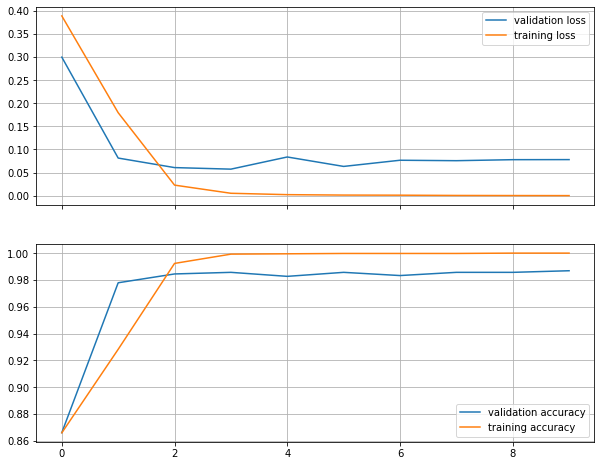

In [10]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()